# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier


# INFO DATA SET

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Menampilkan informasi dataset
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [19]:
# Tampilkan lima baris pertama dataset
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [20]:
# Tampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [21]:
# Periksa jumlah nilai yang hilang
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


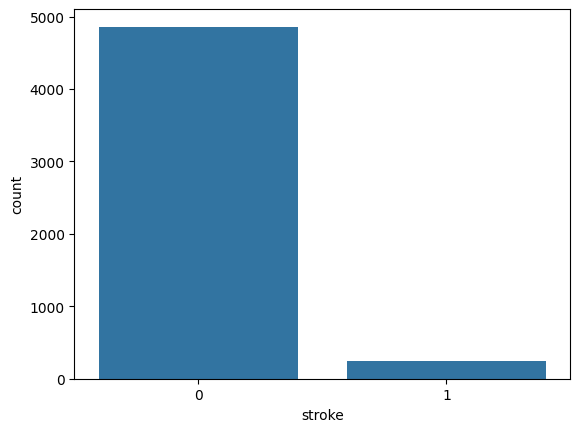

In [22]:
# Analisis eksplorasi data
sns.countplot(x='stroke', data=df)
plt.show()

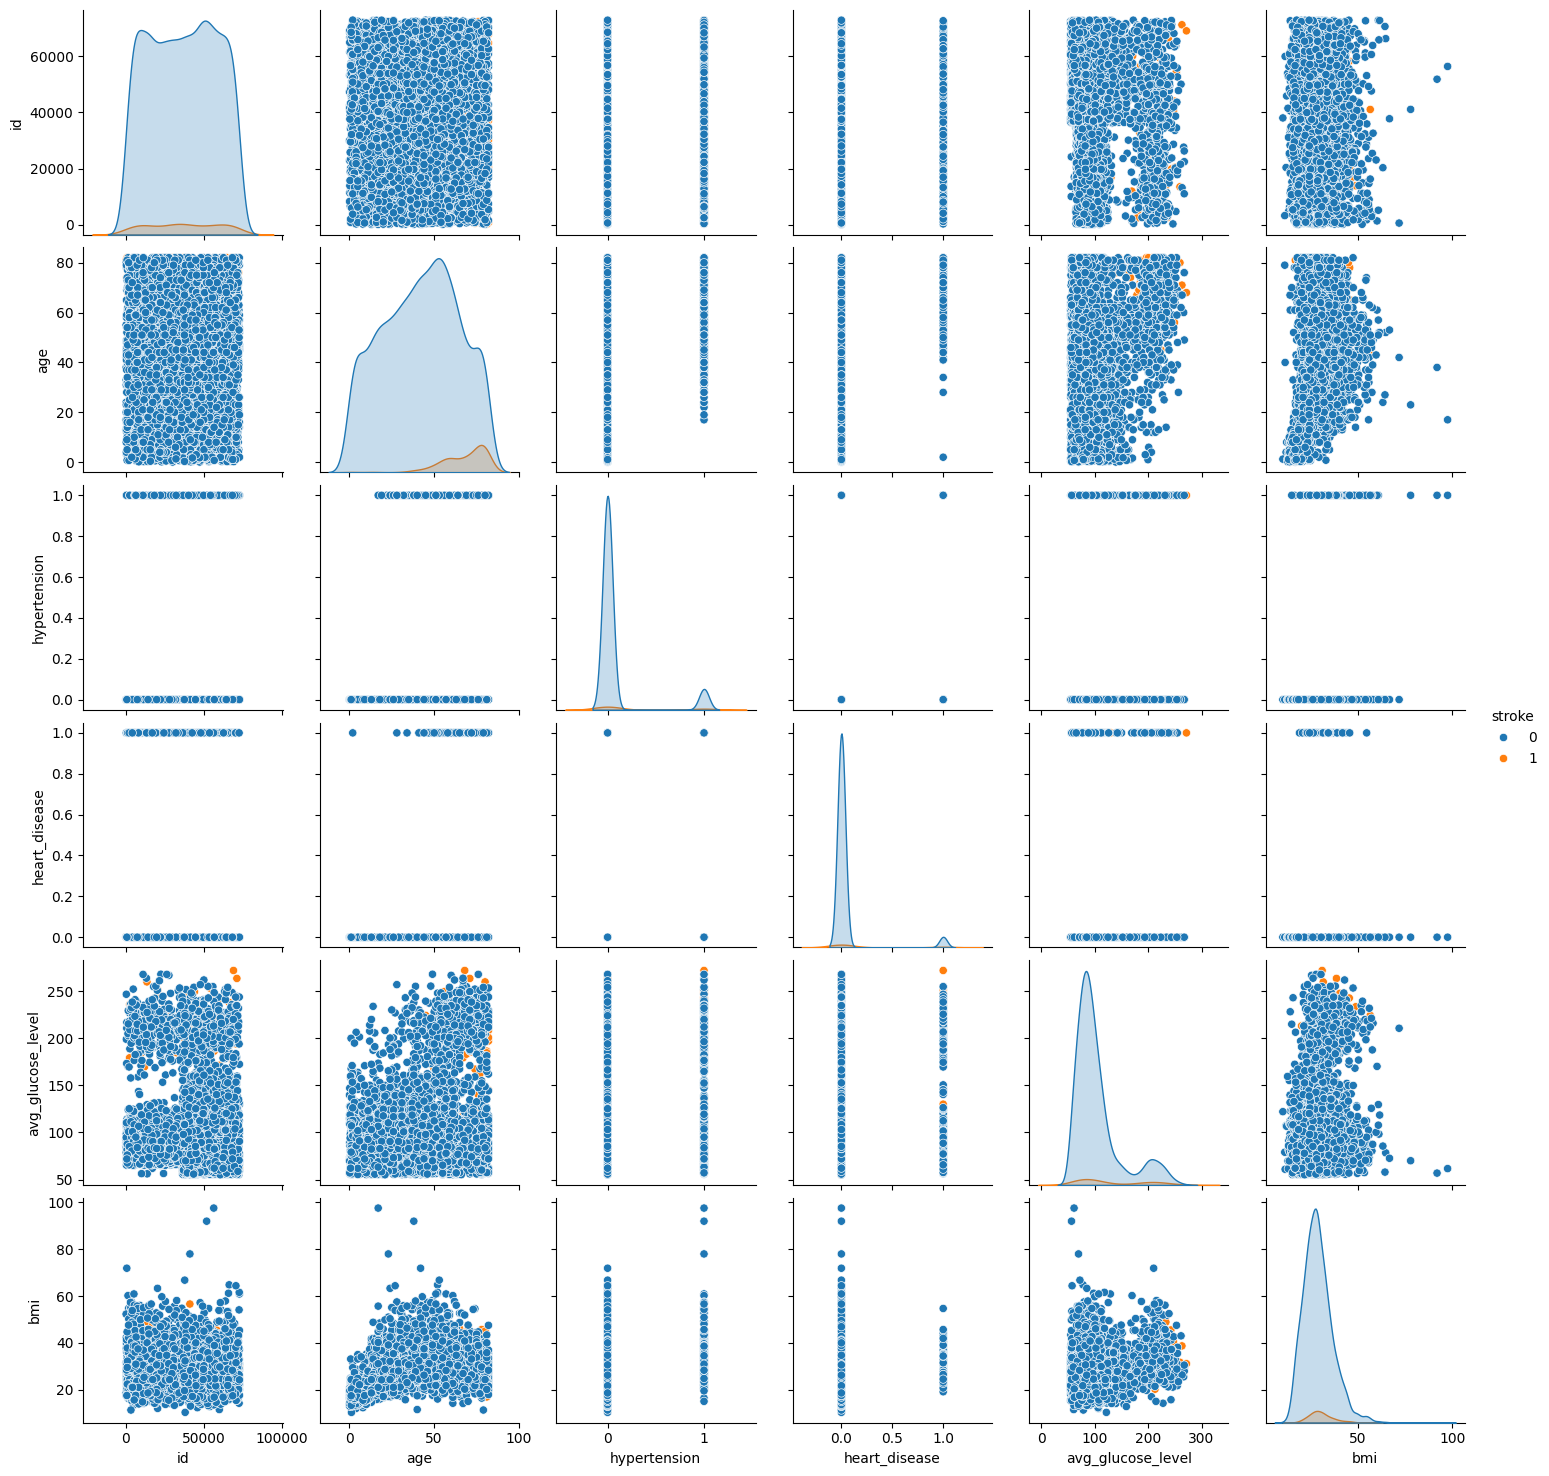

In [24]:
sns.pairplot(df, hue='stroke')
plt.show()

# OPERASI

In [3]:
# Menampilkan data yang hanya mencakup entri yang memiliki nilai "male" (laki-laki)
male_data = df.loc[df['gender'] == 'Male']
print(male_data)

         id gender   age  hypertension  heart_disease ever_married  \
0      9046   Male  67.0             0              1          Yes   
2     31112   Male  80.0             0              1          Yes   
5     56669   Male  81.0             0              0          Yes   
6     53882   Male  74.0             1              1          Yes   
13     8213   Male  78.0             0              1          Yes   
...     ...    ...   ...           ...            ...          ...   
5097  64520   Male  68.0             0              0          Yes   
5098    579   Male   9.0             0              0           No   
5099   7293   Male  40.0             0              0          Yes   
5100  68398   Male  82.0             1              0          Yes   
5108  37544   Male  51.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   

In [4]:
# Menampilkan data yang hanya mencakup entri yang memiliki nilai "female" (perempuan)
female_data = df.loc[df['gender'] == 'Female']
print(female_data)

         id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
7     10434  Female  69.0             0              0           No   
8     27419  Female  59.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
1     Self-employed          Rural             202.21   NaN   never s

In [5]:
# CEK STATUS PERNIKAHAN
status = df.loc[df['ever_married'] == 'Yes']
print(status)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [6]:
# Mengetahui total stroke
X = df.drop(columns=['stroke'])
y = df['stroke']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [7]:
# Mengetahui jumlah gejala hipertensi
status = df.loc[df['hypertension'] == 1]
print(status)

         id  gender   age  hypertension  heart_disease ever_married  \
4      1665  Female  79.0             1              0          Yes   
6     53882    Male  74.0             1              1          Yes   
10    12109  Female  81.0             1              0          Yes   
15    58202  Female  50.0             1              0          Yes   
17    34120    Male  75.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5088  22190  Female  64.0             1              0          Yes   
5091   6369    Male  59.0             1              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5100  68398    Male  82.0             1              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
4     Self-employed          Rural             174.12  24.0   never s

In [8]:
# Mengetahui jumlah BMI
total_bmi = df['bmi'].sum()

print("Total BMI:", total_bmi)

Total BMI: 141836.90000000002


In [9]:
# POSITIF TOTAL STROKE
total_stroke = df['stroke'].sum()

print("Total Positif Stroke:", total_stroke)

Total Positif Stroke: 249


In [10]:
# NEGATIF TOTAL STROKE
tidak_stroke = (df['stroke']==0).sum()

print("Total Tidak Stroke:", tidak_stroke)

Total Tidak Stroke: 4861


In [11]:
# POSITIF HIPERTENSI
total_hyper = df['hypertension'].sum()

print("Total Hipertensi:", total_hyper)

Total Hipertensi: 498


In [12]:
# NEGATIF HIPERTENSI
tidak_hyper = (df['hypertension']==0).sum()

print("Total Tidak Hipertensi:", tidak_hyper)

Total Tidak Hipertensi: 4612


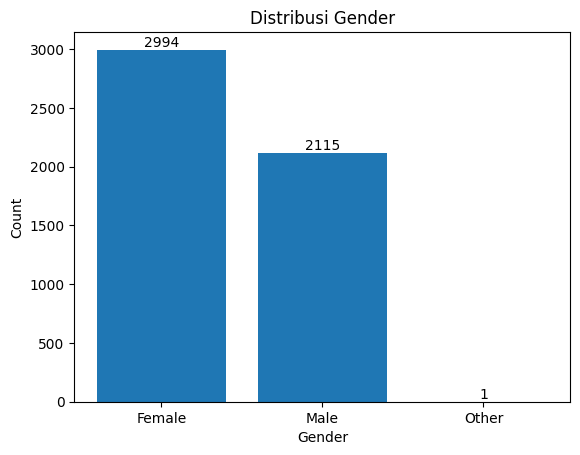

In [39]:
# JUMLAH PASIEN BERDASARKAN GENDER
jumlah_gender = df['gender'].value_counts()

# Plot bar chart
plt.bar(jumlah_gender.index, jumlah_gender.values)

# angka di atas batang
for i, count in enumerate(jumlah_gender.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribusi Gender')
plt.show()


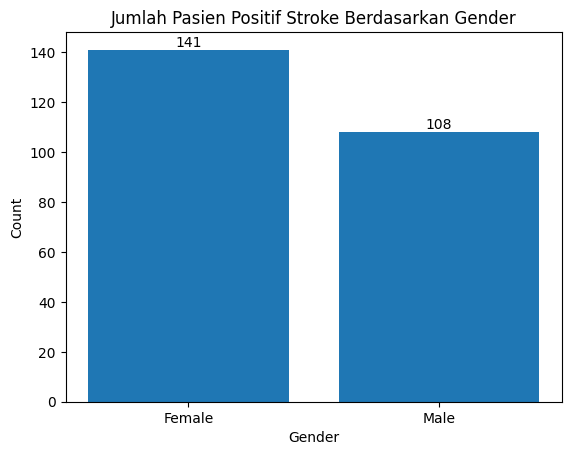

In [27]:
# Filter data untuk kasus positif stroke
df_positive_stroke = df[df['stroke'] == 1]

# Hitung jumlah pasien positif stroke berdasarkan gender
jumlah_gender_stroke = df_positive_stroke['gender'].value_counts()

# Tampilkan jumlah pasien positif stroke berdasarkan gender
plt.bar(jumlah_gender_stroke.index, jumlah_gender_stroke.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Jumlah Pasien Positif Stroke Berdasarkan Gender')

# Saya menambahkan angka diatas batang agar memudahkan membaca grafik
for i, count in enumerate(jumlah_gender_stroke):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()



Jumlah Pasien Positif Stroke Berdasarkan Gender:


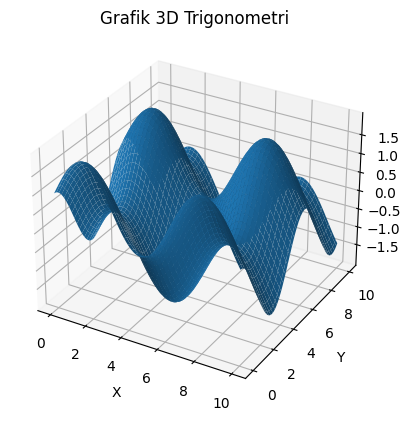

In [15]:
# Filter data untuk kasus positif stroke
df_positive_stroke = df[df['stroke'] == 1]

# Dictionary untuk konversi nilai numerik gender ke label
gender_labels = {0: 'Male', 1: 'Female'}

# Hitung jumlah pasien positif stroke berdasarkan gender
jumlah_gender_stroke = df_positive_stroke['gender'].map(gender_labels).value_counts()

# Tampilkan jumlah pasien positif stroke berdasarkan gender
print("Jumlah Pasien Positif Stroke Berdasarkan Gender:")
for gender, count in jumlah_gender_stroke.items():
    print(gender, count)

# Buat data x, y, dan z
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)

# Fungsi z menggunakan sin
z = np.sin(x) + np.cos(y)

# Buat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(x, y, z)

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafik 3D Trigonometri')

plt.show()


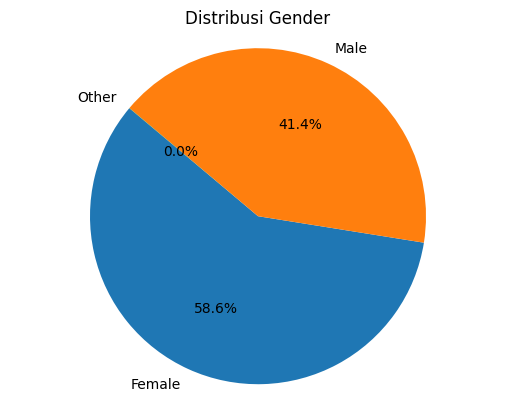

In [ ]:
plt.pie(jumlah_gender, labels=jumlah_gender.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribusi Gender')
plt.show()

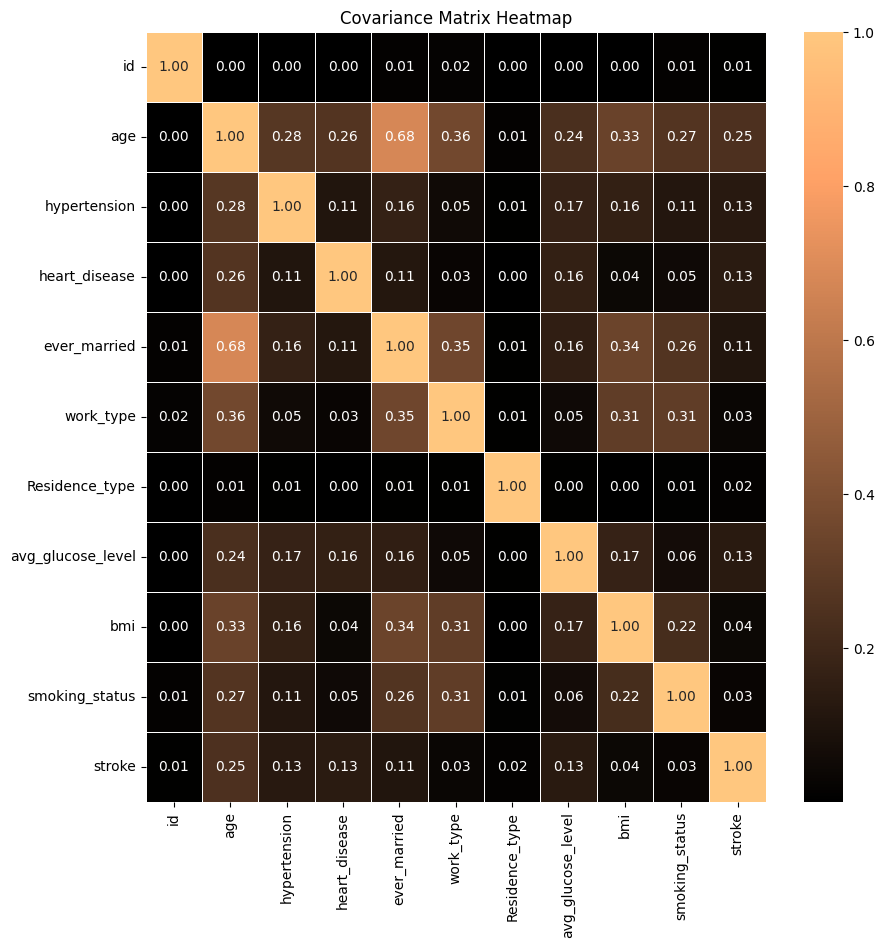

In [ ]:
# Drop kolom non-numerik seperti 'gender'
df_numeric = df.drop(columns=['gender'])

# Label encoding untuk kolom 'work_type' dan 'ever_married'
label_encoder = LabelEncoder()
df_numeric = df_numeric.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Menghitung matriks kovariansi
cov_matrix = df_scaled.cov().abs()

# Plot heatmap matriks kovariansi
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='copper', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
# Mengisi value 'bmi' column dengan median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Handling categorical data
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Memanggil id dan penyakit stroke
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# Split dataset ke train dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memasukkan Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Prediksi dengan test data
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9070450097847358

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.18      0.15      0.16        62

    accuracy                           0.91      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.90      0.91      0.90      1022


Confusion Matrix:
 [[918  42]
 [ 53   9]]


In [37]:
# Hitung jumlah pasien positif stroke dengan heart disease
positif_stroke_heart_disease = df[(df['stroke'] == 1) & (df['heart_disease'] == 1)].shape[0]

# Hitung jumlah pasien negatif stroke dengan heart disease
negatif_stroke_heart_disease = df[(df['stroke'] == 1) & (df['heart_disease'] == 0)].shape[0]

# Hitung jumlah pasien positif stroke tanpa heart disease
positif_stroke_no_heart_disease = df[(df['stroke'] == 1) & (df['heart_disease'] == 0)].shape[0]

# Hitung jumlah pasien negatif stroke tanpa heart disease
negatif_stroke_no_heart_disease = df[(df['stroke'] == 0) & (df['heart_disease'] == 0)].shape[0]

# Total jumlah pasien dengan heart disease
total_heart_disease = df[df['heart_disease'] == 1].shape[0]

# Total jumlah pasien tanpa heart disease
total_no_heart_disease = df[df['heart_disease'] == 0].shape[0]

# Persentase kemungkinan terkena stroke jika positif heart disease
persentase_positif_stroke_heart_disease = (positif_stroke_heart_disease / total_heart_disease) * 100

# Persentase kemungkinan terkena stroke jika negatif heart disease
persentase_negatif_stroke_heart_disease = (negatif_stroke_heart_disease / total_heart_disease) * 100

# Persentase kemungkinan tidak terkena stroke jika negatif heart disease
persentase_negatif_stroke_no_heart_disease = (negatif_stroke_no_heart_disease / total_no_heart_disease) * 100

# Tampilkan hasil
print("Jumlah Pasien Positif Stroke dengan Heart Disease:", positif_stroke_heart_disease)
print("Jumlah Pasien Negatif Stroke dengan Heart Disease:", negatif_stroke_heart_disease)
print("Jumlah Pasien Positif Stroke tanpa Heart Disease:", positif_stroke_no_heart_disease)
print("Jumlah Pasien Negatif Stroke tanpa Heart Disease:", negatif_stroke_no_heart_disease)

print("\nPersentase Kemungkinan Terkena Stroke Jika Positif Heart Disease: {:.2f}%".format(persentase_positif_stroke_heart_disease))
print("Persentase Kemungkinan Terkena Stroke Jika Negatif Heart Disease: {:.2f}%".format(persentase_negatif_stroke_heart_disease))
print("Persentase Kemungkinan Tidak Terkena Stroke Jika Negatif Heart Disease: {:.2f}%".format(persentase_negatif_stroke_no_heart_disease))



Jumlah Pasien Positif Stroke dengan Heart Disease: 47
Jumlah Pasien Negatif Stroke dengan Heart Disease: 202
Jumlah Pasien Positif Stroke tanpa Heart Disease: 202
Jumlah Pasien Negatif Stroke tanpa Heart Disease: 4632

Persentase Kemungkinan Terkena Stroke Jika Positif Heart Disease: 17.03%
Persentase Kemungkinan Terkena Stroke Jika Negatif Heart Disease: 73.19%
Persentase Kemungkinan Tidak Terkena Stroke Jika Negatif Heart Disease: 95.82%
